In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re # Thư viện xử lý biểu thức chính quy (Regular Expressions) để làm sạch văn bản
import string

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
#Đọc dữ liệu
df = pd.read_csv('bbc-news-data.csv', delimiter = '\t')
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [27]:
#Tạo cột text mới
df['text'] = df['title'] + ' ' + df['content']
df.head()

,category,filename,title,content,text
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Ad sales boost Time Warner profit Quarterly p...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,Dollar gains on Greenspan speech The dollar h...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,Yukos unit buyer faces loan claim The owners ...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits British Air...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq Shares in U...


In [28]:
#Tiến hành làm sạch văn bản
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation) , '', text)
    text = re.sub(r'\w*\d\w*', '',text)
    text = re.sub(r'[‘’“”…]', '', text)
    text = re.sub(r'\n', '',text)
    return text

In [29]:
#Tạo cột đã làm sạch
df['text_clean'] = df['text'].apply(clean_text)
df.head()

,category,filename,title,content,text,text_clean
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly p...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,Dollar gains on Greenspan speech The dollar h...,dollar gains on greenspan speech the dollar h...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,Yukos unit buyer faces loan claim The owners ...,yukos unit buyer faces loan claim the owners ...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits British Air...,high fuel prices hit bas profits british airw...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq Shares in U...,pernod takeover talk lifts domecq shares in u...


In [30]:
#Vector hóa và lấy target X
vectorizer = TfidfVectorizer(stop_words = 'english',max_features = 2000)# Giới hạn số lượng từ để xử lý nhanh hơn

X = vectorizer.fit_transform(df['text_clean'])

In [31]:
#Tìm Số Cụm Tối Ưu (K)

inertia_scores = []
k_range = range(2,11) # Thử k từ 2 đến 10

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

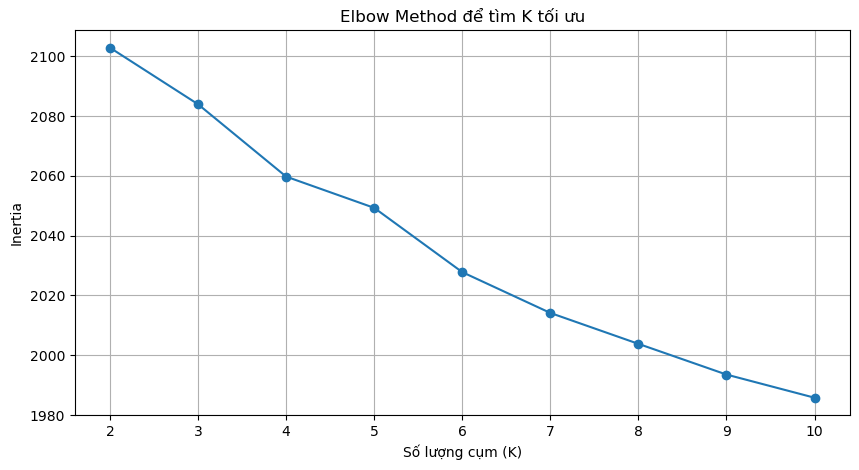

In [32]:
#Trực quan bằng biểu đồ
plt.figure(figsize=(10,5))

plt.plot(k_range,inertia_scores, marker= 'o')

plt.title('Elbow Method để tìm K tối ưu')
plt.xlabel('Số lượng cụm (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [33]:
#Chọn ra k tối ưu dựa trên biểu đồ, tìm điểm "khuỷu tay (gấp khúc)" và điểm có sự khác biệt về inertia
# ===> Ta thấy 4 lên 5 có sự giảm ít về inertia và cũng là điểm "khuỷu tay" => Chọn k = 5
final_k = 5
kmeans = KMeans(n_clusters = final_k, random_state =42, n_init='auto')

# Fit và dự đoán nhãn cụm cho mỗi chủ đề
labels = kmeans.fit_predict(X)

# Thêm cột cluster vào DataFrame để dễ phân tích
df['cluster'] = labels
df.head()

,category,filename,title,content,text,text_clean,cluster
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,Ad sales boost Time Warner profit Quarterly p...,ad sales boost time warner profit quarterly p...,2
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,Dollar gains on Greenspan speech The dollar h...,dollar gains on greenspan speech the dollar h...,2
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,Yukos unit buyer faces loan claim The owners ...,yukos unit buyer faces loan claim the owners ...,2
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,High fuel prices hit BA's profits British Air...,high fuel prices hit bas profits british airw...,2
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,Pernod takeover talk lifts Domecq Shares in U...,pernod takeover talk lifts domecq shares in u...,2


In [34]:
#Diễn giải ý nghĩa của các cụm

print("Các từ khóa hàng đầu cho mỗi cụm:")

# Lấy ra các tâm của cụm (cluster centers)
order_centroids = kmeans.cluster_centers_.argsort()[:,::-1]

terms = vectorizer.get_feature_names_out()

for i in range(final_k):
    print(f"Cụm {i}:", end='')
    for j in order_centroids[i,:10]: # Lấy 10 từ hàng đầu
        print(f' {terms[j]}', end=',')
    print()

Các từ khóa hàng đầu cho mỗi cụm:
Cụm 0: film, best, awards, award, films, band, album, festival, actor, star,
Cụm 1: club, chelsea, game, league, united, arsenal, liverpool, cup, manager, said,
Cụm 2: said, mr, government, labour, election, year, blair, economy, growth, new,
Cụm 3: england, world, win, wales, game, ireland, said, champion, rugby, match,
Cụm 4: said, people, music, mobile, technology, users, digital, software, phone, games,


In [35]:
# Trực Quan Hóa Các Cụm
# Giảm chiều dữ liệu bằng PCA
# Giảm xuống 2 chiều
pca = PCA(n_components = 2, random_state=42)
X_pca = pca.fit_transform(X.toarray())

In [36]:
# Tạo DataFrame mới để vẽ
df_pca = pd.DataFrame(data = X_pca, columns=['component_1','component_2'])
df_pca['cluster'] = labels

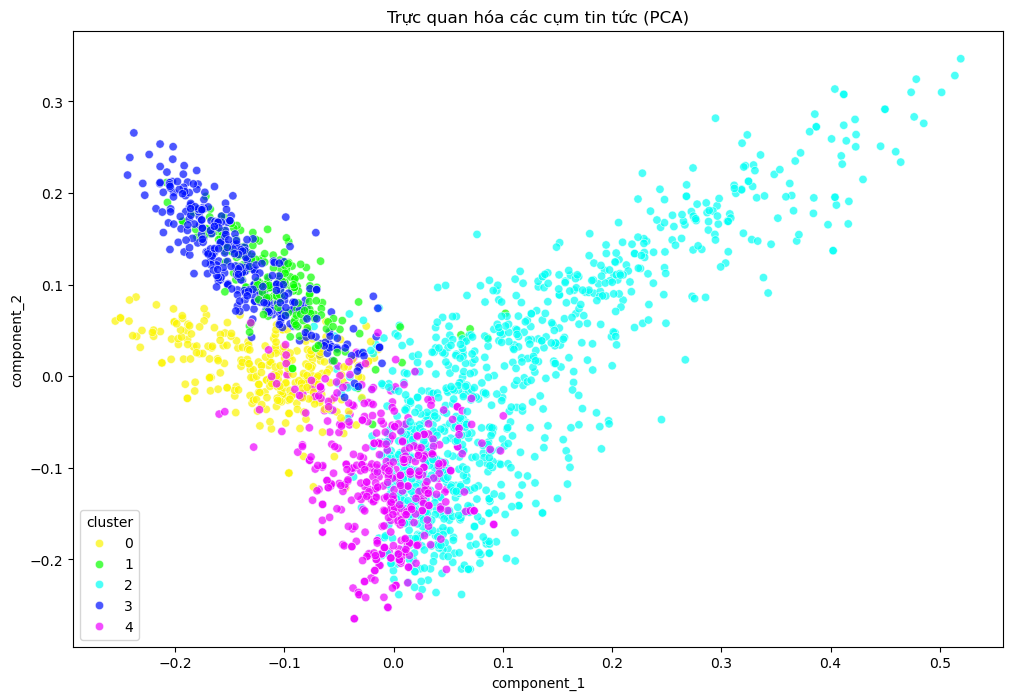

In [37]:
# Vẽ biểu đồ phân tán (Scatter Plot)

plt.figure(figsize=(12, 8))

sns.scatterplot(x = 'component_1',y = 'component_2', hue = 'cluster', 
            palette = sns.color_palette('hsv',n_colors = final_k), data=df_pca, legend = 'full',alpha =0.7)
plt.title('Trực quan hóa các cụm tin tức (PCA)')
plt.show() 